In [159]:
import pandas
import datetime
from matplotlib import pyplot
import matplotlib.dates as dates
import ipywidgets
from IPython.display import display, HTML

In [201]:
data_file_path = "covid-19-data/data/time-series-19-covid-combined.csv"
covid_data = pandas.read_csv(data_file_path)

In [203]:
temp_covid_data = covid_data.sort_values(by=["Date"], ascending=False)
last_date = temp_covid_data.Date.iloc[0]

covid_last_data = covid_data[covid_data['Date'] == last_date]
covid_poland_data = covid_data[covid_data["Country/Region"] == "Poland"]
covid_poland_last_data = covid_last_data[covid_data["Country/Region"] == "Poland"]


In [193]:
x = covid_poland_data.Date.tolist()
prepared_x = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in x]
y = covid_poland_data["Confirmed"]

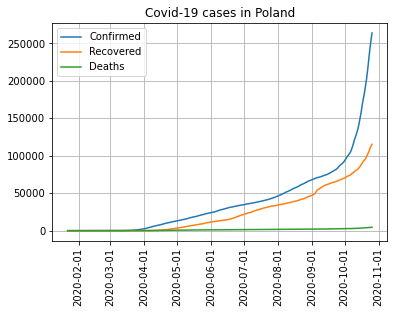

In [167]:
ax = pyplot.gca()
pyplot.xticks(rotation="vertical")
pyplot.grid()
date_formatter = dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_formatter)
pyplot.plot(prepared_x,covid_poland_data["Confirmed"])
pyplot.plot(prepared_x, covid_poland_data["Recovered"])
pyplot.plot(prepared_x, covid_poland_data["Deaths"])
pyplot.legend(["Confirmed", "Recovered", "Deaths"])
pyplot.title("Covid-19 cases in Poland")
pyplot.show()

In [204]:
display(ipywidgets.Label("Last COVID-19 cases in the world"))
display(ipywidgets.Label("----------"))
for case in ["Confirmed", "Recovered", "Deaths"]:
    display(ipywidgets.Label(case + ": " + str(int(covid_last_data[case].sum()))))

Label(value='Last COVID-19 cases in the world')

Label(value='----------')

Label(value='Confirmed: 43483973')

Label(value='Recovered: 29011946')

Label(value='Deaths: 1159397')

In [205]:
data_types = ["Confirmed", "Recovered", "Deaths"]
content = ["Poland: " + str(int(covid_poland_last_data[data_type])) + "\r\nTotal: " + str(int(covid_last_data.sum()[data_type])) for data_type in data_types]
content = [ipywidgets.Label(name) for name in content]
tab = ipywidgets.Tab()
tab.children = content
for i in range(len(data_types)):
    tab.set_title(i, data_types[i])
tab

In [179]:
total_cases = covid_last_data[["Country/Region", "Province/State", "Confirmed", "Recovered", "Deaths"]]
display(HTML(total_cases.to_html()))

,Country/Region,Province/State,Confirmed,Recovered,Deaths
278,Afghanistan,NaN,40937,34150.0,1518
557,Albania,NaN,19445,10705.0,480
836,Algeria,NaN,56419,39273.0,1922
1115,Andorra,NaN,4325,2957.0,72
1394,Angola,NaN,9644,3530.0,270
1673,Antigua and Barbuda,NaN,124,108.0,3
1952,Argentina,NaN,1102301,909586.0,29301
2231,Armenia,NaN,78810,51162.0,1196
2510,Australia,Australian Capital Territory,114,110.0,3
2789,Australia,New South Wales,4398,3147.0,53
